# <font color='navy'> Effective Spread

Luis Márquez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aapl_5m_train.csv')
df.drop(columns=['Volume', 'Unnamed: 0', 'Timestamp', 'Gmtoffset'], inplace=True)
df['Diff'] = df['Close'].diff()
df = df.dropna().reset_index(drop=True)

## <font color='cornflowerblue'> Block Method

In [3]:
windows = [5, 10, 20, 50, 100]

for window in windows:
    covs = [np.nan] * len(df)
    
    for i in range(len(df) - 2*window + 1):
        block1 = df['Diff'][i:i+window]
        block2 = df['Diff'][i+window:i+2*window]
        
        cov_val = np.abs(np.cov(block1, block2)[0, 1])
        
        covs[i + 2*window - 1] = cov_val
    
    df[f'Cov_{window}'] = covs
    df[f'Spread_{window}'] = 2 * np.sqrt(df[f'Cov_{window}'])

df

,Datetime,Open,High,Low,Close,Diff,Cov_5,Spread_5,Cov_10,Spread_10,Cov_20,Spread_20,Cov_50,Spread_50,Cov_100,Spread_100
0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,-0.919998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,0.169998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,0.190003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,-0.660004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04 14:55:00,132.000000,132.089996,131.300003,131.448898,-0.141098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,0.014999,0.005183,0.143989,0.001034,0.064309,0.001851,0.086049,0.000548,0.046804,0.010052,0.200519
39568,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,0.325012,0.010577,0.205689,0.000199,0.028237,0.001259,0.070957,0.000557,0.047191,0.010005,0.200046
39569,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,0.384400,0.007774,0.176345,0.009258,0.192435,0.002945,0.108540,0.000333,0.036521,0.010244,0.202426
39570,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,0.185592,0.007761,0.176193,0.008288,0.182080,0.001540,0.078493,0.000748,0.054715,0.010351,0.203482


In [4]:
bid_ask_df = pd.DataFrame()

for i in range(len(windows)):
    bid_ask_df[f'Bid_{windows[i]}'] = np.where(df['Diff'] > 0, df['Close'] - df[f'Spread_{windows[i]}'], df['Close'])
    bid_ask_df[f'Ask_{windows[i]}'] = np.where(df['Diff'] > 0, df['Close'], df['Close'] + df[f'Spread_{windows[i]}'])

bid_ask_df

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN
1,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
2,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
3,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
4,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...
39567,128.911003,129.054992,128.990683,129.054992,128.968943,129.054992,129.008188,129.054992,128.854473,129.054992
39568,129.174315,129.380004,129.351767,129.380004,129.309047,129.380004,129.332813,129.380004,129.179958,129.380004
39569,129.588059,129.764404,129.571969,129.764404,129.655864,129.764404,129.727883,129.764404,129.561978,129.764404
39570,129.773803,129.949996,129.767916,129.949996,129.871503,129.949996,129.895281,129.949996,129.746514,129.949996


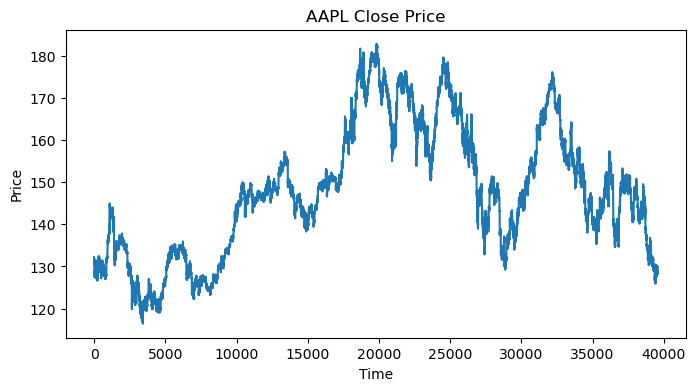

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(df['Close'])
plt.title('AAPL Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

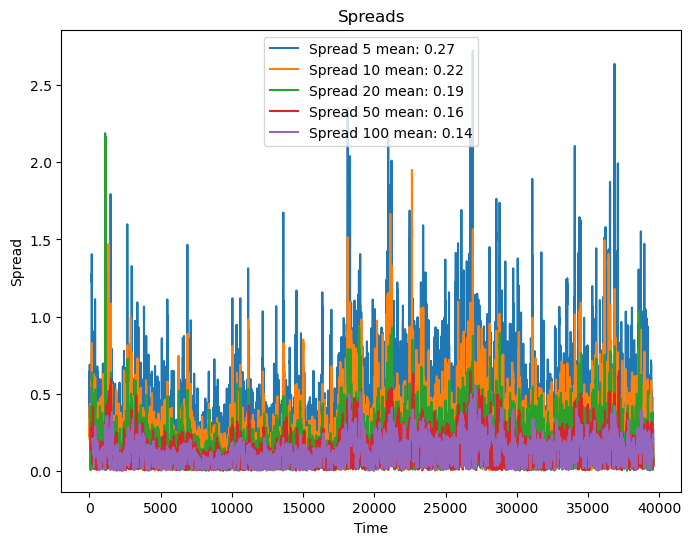

In [6]:
spreads = [df[f'Spread_{w}'] for w in windows]
plt.figure(figsize=(8, 6))
for i, spread in enumerate(spreads):
    plt.plot(spread, label=f'Spread {windows[i]} mean: {spread.mean():.2f}')
plt.title('Spreads')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.show()

## <font color='cornflowerblue'> Serial Covariance

In [7]:
df = pd.read_csv('aapl_5m_train.csv')
df.drop(columns=['Volume', 'Unnamed: 0', 'Timestamp', 'Gmtoffset'], inplace=True)
df['Diff'] = df['Close'].diff()
df['Diff_Lag'] = df['Diff'].shift(1)
df = df.dropna().reset_index(drop=True)

In [8]:
windows = [5, 10, 20, 50, 100]

df['Operation_Type'] = np.where(df['Diff'] > 0, 'Ask', 'Bid')

for window in windows:
    df[f'Cov_{window}'] = np.abs(df['Diff'].rolling(window=window).cov(df['Diff_Lag']))
    df[f'Spread_{window}'] = 2 * np.sqrt(df[f'Cov_{window}'])

df

,Datetime,Open,High,Low,Close,Diff,Diff_Lag,Operation_Type,Cov_5,Spread_5,Cov_10,Spread_10,Cov_20,Spread_20,Cov_50,Spread_50,Cov_100,Spread_100
0,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,0.169998,-0.919998,Ask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,0.190003,0.169998,Ask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,-0.660004,0.190003,Bid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04 14:55:00,132.000000,132.089996,131.300003,131.448898,-0.141098,-0.660004,Bid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04 15:00:00,131.544998,131.669998,131.070007,131.119995,-0.328903,-0.141098,Bid,0.079894,0.565312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39564,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,0.014999,0.019989,Ask,0.002153,0.092807,0.007281,0.170663,0.002021,0.089920,0.001597,0.079913,0.004417,0.132918
39565,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,0.325012,0.014999,Ask,0.002983,0.109240,0.008514,0.184538,0.003648,0.120792,0.001944,0.088185,0.004450,0.133413
39566,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,0.384400,0.325012,Ask,0.013455,0.231993,0.001375,0.074165,0.000684,0.052312,0.000681,0.052211,0.005782,0.152079
39567,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,0.185592,0.384400,Ask,0.011183,0.211500,0.005165,0.143741,0.002100,0.091643,0.001991,0.089236,0.006512,0.161393


In [9]:
bid_ask_df = pd.DataFrame()

for i in range(len(windows)):
    bid_ask_df[f'Bid_{windows[i]}'] = np.where(df['Diff'] > 0, df['Close'] - df[f'Spread_{windows[i]}'], df['Close'])
    bid_ask_df[f'Ask_{windows[i]}'] = np.where(df['Diff'] > 0, df['Close'], df['Close'] + df[f'Spread_{windows[i]}'])

bid_ask_df

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
1,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
2,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
3,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
4,131.119995,131.685307,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN
...,...,...,...,...,...,...,...,...,...,...
39564,128.962185,129.054992,128.884329,129.054992,128.965072,129.054992,128.975079,129.054992,128.922074,129.054992
39565,129.270764,129.380004,129.195466,129.380004,129.259212,129.380004,129.291819,129.380004,129.246591,129.380004
39566,129.532411,129.764404,129.690239,129.764404,129.712092,129.764404,129.712193,129.764404,129.612325,129.764404
39567,129.738496,129.949996,129.806255,129.949996,129.858353,129.949996,129.860760,129.949996,129.788603,129.949996


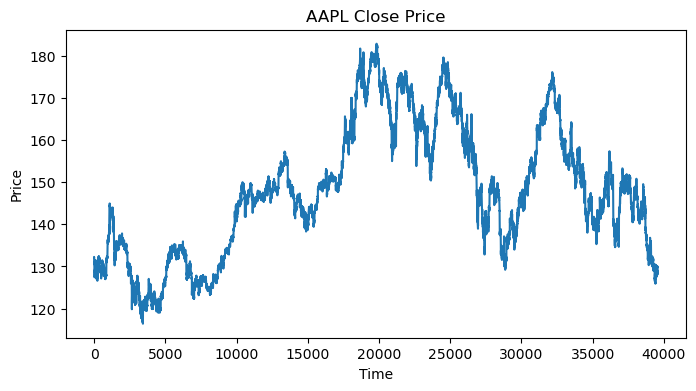

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(df['Close'])
plt.title('AAPL Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

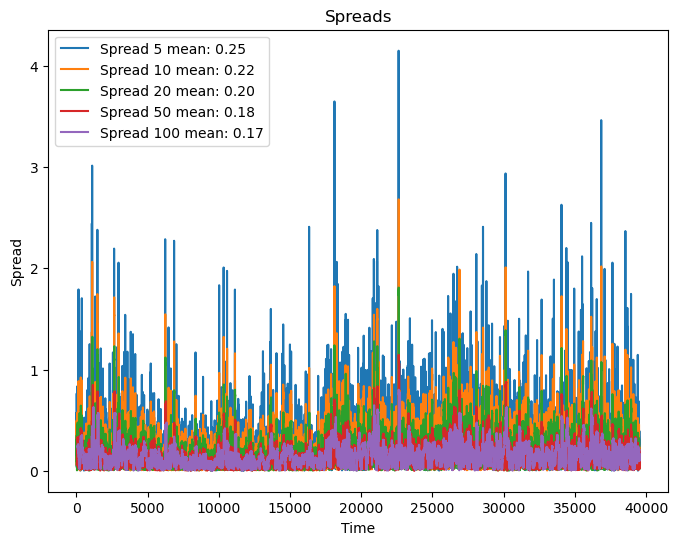

In [11]:
spreads = [df[f'Spread_{w}'] for w in windows]
plt.figure(figsize=(8, 6))
for i, spread in enumerate(spreads):
    plt.plot(spread, label=f'Spread {windows[i]} mean: {spread.mean():.2f}')
plt.title('Spreads')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.show()